<a href="https://colab.research.google.com/github/An-tianqi/Machine-Learning/blob/main/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(891, 12)
(418, 11)


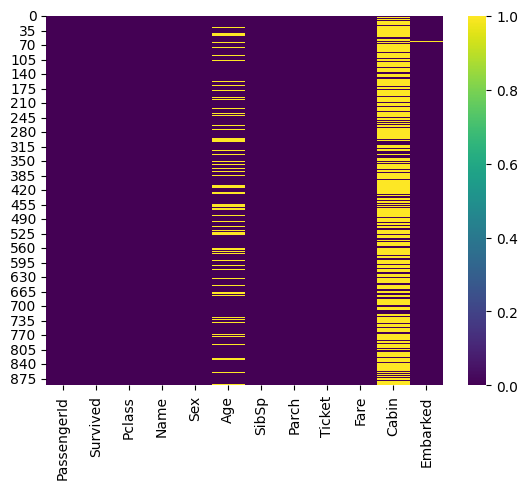

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gender_sub = pd.read_csv("./gender_submission.csv")
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

print(train.shape)
print(test.shape)

sns.heatmap(train.isnull(), cmap='viridis')
plt.show()



In [74]:
# le % d'âge des valeurs NaN

nan_percentage = (train['Age'].isnull().sum() / len(train)) * 100

print(nan_percentage)

19.865319865319865


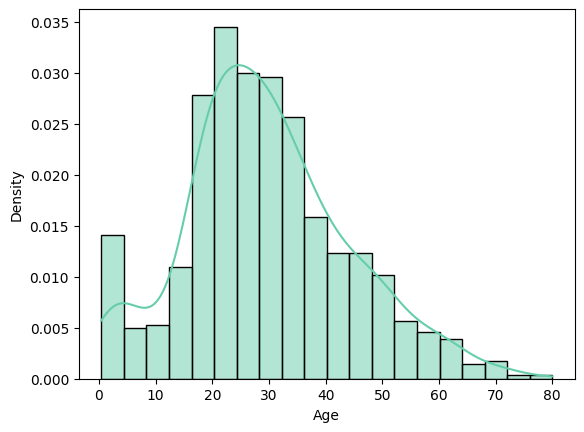

In [75]:
plt.figure()
sns.histplot(train['Age'], kde=True, stat="density", color="mediumaquamarine")
plt.show()


In [76]:
median = train['Age'].median()
mean = train['Age'].mean()

print(f"median : {median}")
print(f"moyenne : {mean}")

median : 28.0
moyenne : 29.69911764705882


In [77]:
# le % de Cabin des valeurs NaN

nan_percentage = (train['Cabin'].isnull().sum() / len(train)) * 100

print(nan_percentage)

77.10437710437711


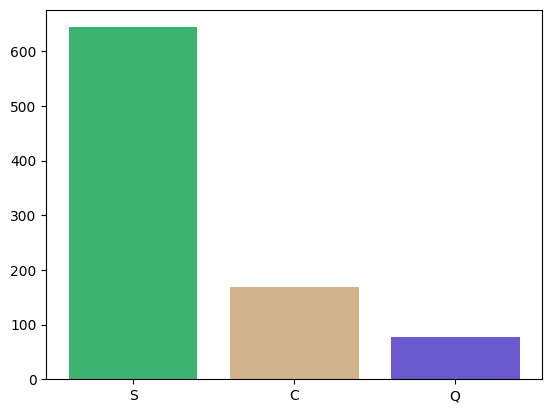

In [78]:
distribution = train['Embarked'].value_counts()

plt.bar(distribution.index, distribution.values, color=['mediumseagreen', 'tan', 'slateblue'])

plt.show()

In [79]:
# deep copy
newTrain = train.copy(deep=True)


newTrain["Age"] = newTrain["Age"].replace(np.nan, 28.0)

newTrain["Embarked"] = newTrain["Embarked"].replace(np.nan, "S")

my_cols = set(newTrain.columns)

my_cols.remove('Cabin')

newTrain2 = newTrain[my_cols]

newTrain2



<ipython-input-79-6ee6b00d1587>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  newTrain2 = newTrain[my_cols]


,Parch,Survived,Age,PassengerId,Ticket,Embarked,Fare,Sex,Name,Pclass,SibSp
0,0,0,22.0,1,A/5 21171,S,7.2500,male,"Braund, Mr. Owen Harris",3,1
1,0,1,38.0,2,PC 17599,C,71.2833,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1
2,0,1,26.0,3,STON/O2. 3101282,S,7.9250,female,"Heikkinen, Miss. Laina",3,0
3,0,1,35.0,4,113803,S,53.1000,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1
4,0,0,35.0,5,373450,S,8.0500,male,"Allen, Mr. William Henry",3,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,887,211536,S,13.0000,male,"Montvila, Rev. Juozas",2,0
887,0,1,19.0,888,112053,S,30.0000,female,"Graham, Miss. Margaret Edith",1,0
888,2,0,28.0,889,W./C. 6607,S,23.4500,female,"Johnston, Miss. Catherine Helen ""Carrie""",3,1
889,0,1,26.0,890,111369,C,30.0000,male,"Behr, Mr. Karl Howell",1,0


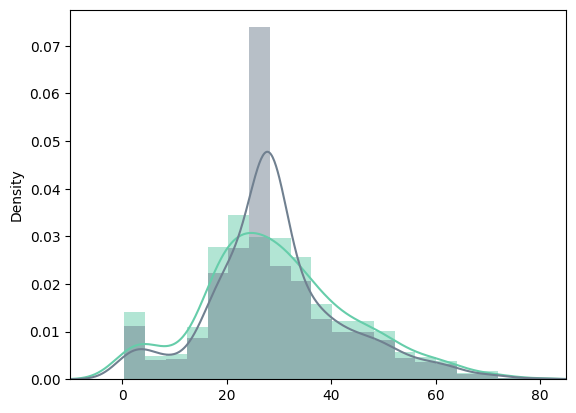

In [98]:
plt.figure()

plt.hist(train["Age"], bins=20, color='mediumaquamarine', density=True, stacked=True, alpha=0.5)
train["Age"].plot(kind='density', color='mediumaquamarine')

plt.hist(newTrain2["Age"], bins=20, color='slategrey', density=True, stacked=True, alpha=0.5)
newTrain2["Age"].plot(kind='density', color='slategrey')
plt.xlim(-10,85)
plt.show()


In [99]:
newTrain2['TravelAlone'] = (newTrain2['SibSp'] == 0) & (newTrain2['Parch'] == 0)

newTrain2['TravelAlone'] = newTrain2['TravelAlone'].astype(int)

newTrain2.drop(['SibSp', 'Parch'], axis=1, inplace=True)
newTrain2

,Survived,Age,PassengerId,Ticket,Embarked,Fare,Sex,Name,Pclass,TravelAlone
0,0,22.0,1,A/5 21171,S,7.2500,male,"Braund, Mr. Owen Harris",3,0
1,1,38.0,2,PC 17599,C,71.2833,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
2,1,26.0,3,STON/O2. 3101282,S,7.9250,female,"Heikkinen, Miss. Laina",3,1
3,1,35.0,4,113803,S,53.1000,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
4,0,35.0,5,373450,S,8.0500,male,"Allen, Mr. William Henry",3,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,887,211536,S,13.0000,male,"Montvila, Rev. Juozas",2,1
887,1,19.0,888,112053,S,30.0000,female,"Graham, Miss. Margaret Edith",1,1
888,0,28.0,889,W./C. 6607,S,23.4500,female,"Johnston, Miss. Catherine Helen ""Carrie""",3,0
889,1,26.0,890,111369,C,30.0000,male,"Behr, Mr. Karl Howell",1,1


In [100]:
newTrain3 = pd.get_dummies(newTrain2, columns=["Pclass","Embarked","Sex"])

newTrain3

,Survived,Age,PassengerId,Ticket,Fare,Name,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,A/5 21171,7.2500,"Braund, Mr. Owen Harris",0,0,0,1,0,0,1,0,1
1,1,38.0,2,PC 17599,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,0,1,0,0,1,0
2,1,26.0,3,STON/O2. 3101282,7.9250,"Heikkinen, Miss. Laina",1,0,0,1,0,0,1,1,0
3,1,35.0,4,113803,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,0,0,0,1,1,0
4,0,35.0,5,373450,8.0500,"Allen, Mr. William Henry",1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,887,211536,13.0000,"Montvila, Rev. Juozas",1,0,1,0,0,0,1,0,1
887,1,19.0,888,112053,30.0000,"Graham, Miss. Margaret Edith",1,1,0,0,0,0,1,1,0
888,0,28.0,889,W./C. 6607,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",0,0,0,1,0,0,1,1,0
889,1,26.0,890,111369,30.0000,"Behr, Mr. Karl Howell",1,1,0,0,1,0,0,0,1


In [101]:
newTrain3.drop(['PassengerId','Name','Sex_female','Ticket'], axis=1, inplace=True)

newTrain3

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1
887,1,19.0,30.0000,1,1,0,0,0,0,1,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1


In [84]:
newTest = test.copy()
newTest["Age"].fillna(test["Age"].median(skipna=True), inplace=True)
newTest["Embarked"].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)
newTest.drop('Cabin', axis=1, inplace=True)

newTest.isnull().sum()

newTest['TravelAlone'] = (newTest['SibSp'] == 0) & (newTest['Parch'] == 0)

newTest['TravelAlone'] = newTest['TravelAlone'].astype(int)

newTest.drop(['SibSp', 'Parch'], axis=1, inplace=True)

newTest2 = pd.get_dummies(newTest, columns=["Pclass","Embarked","Sex"])

newTest2.drop(['PassengerId','Name','Sex_female','Ticket'], axis=1, inplace=True)


newTest2

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,0,1,0,0,1,1
414,39.0,108.9000,1,1,0,0,1,0,0,0
415,38.5,7.2500,1,0,0,1,0,0,1,1
416,27.0,8.0500,1,0,0,1,0,0,1,1


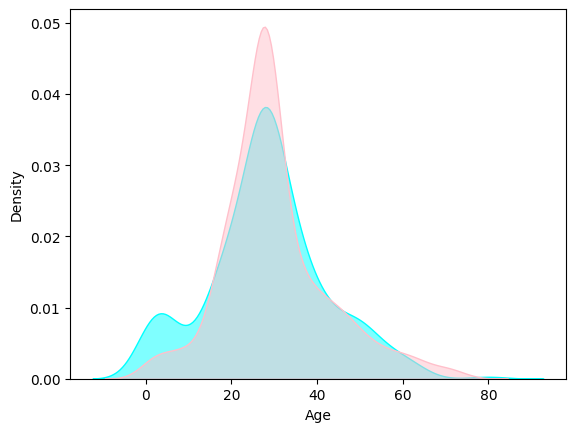

In [102]:
sns.kdeplot(newTrain3["Age"][newTrain3.Survived == 1], fill=True, alpha=0.5, color="cyan")
sns.kdeplot(newTrain3["Age"][newTrain3.Survived == 0], fill=True, alpha=0.5, color="pink")


plt.show()

In [103]:
newTrain3['IsMinor']=np.where((newTrain2["Age"])<16, 1, 0)

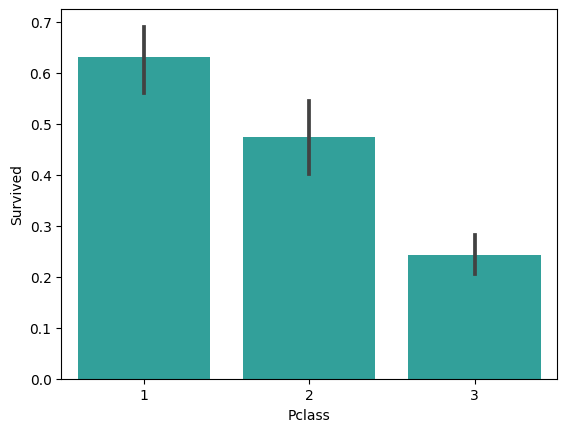

In [105]:
sns.barplot(x='Pclass', y='Survived', data=newTrain2, color="lightseagreen")

plt.show()

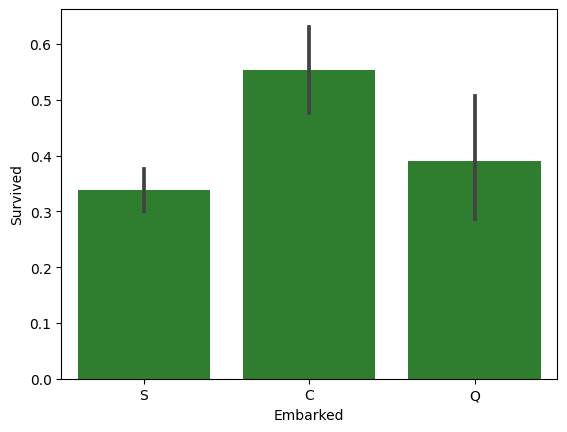

In [107]:
sns.barplot(x='Embarked', y='Survived', data=newTrain2, color="forestgreen")
plt.show()

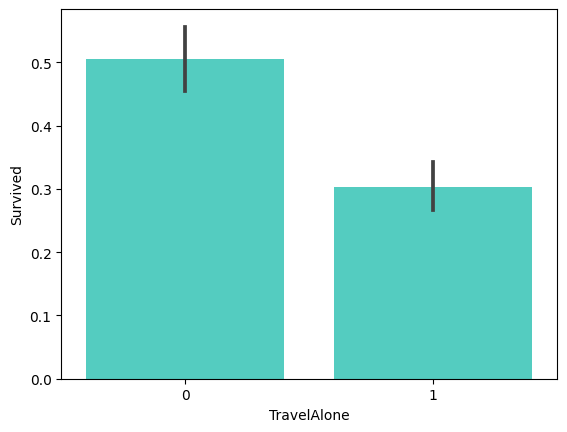

In [108]:
sns.barplot(x='TravelAlone', y='Survived', data=newTrain2, color="turquoise")
plt.show()

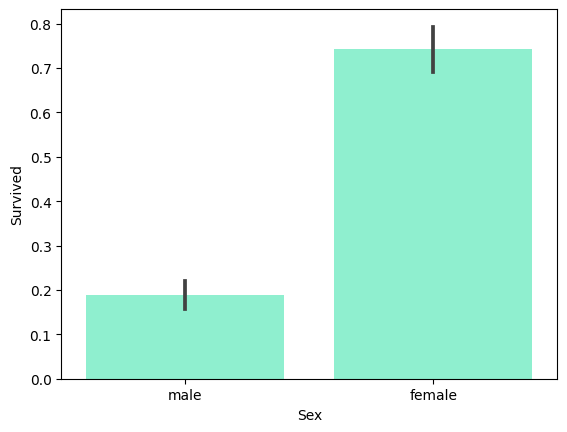

In [110]:
sns.barplot(x='Sex', y='Survived', data=newTrain2, color="aquamarine")
plt.show()

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


tab = ['Age','TravelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor']
X = newTrain3[tab]
Y = newTrain3['Survived']

lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X,Y)
selection = X.columns[rfe.support_]
print("Les features séléctionnée :", selection )

Les features séléctionnée : Index(['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,Y)
selected_features = X.columns[rfe.support_]
print("Les features séléctionnée :", selected_features )

Les features séléctionnée : Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
rfe = RFECV(lr, scoring='accuracy')
rfe.fit(X,Y)

print("Optimal number of features: ", rfe.n_features_)
print("Selected features: ", X.columns[rfe.support_])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimal number of features:  8
Selected features:  Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

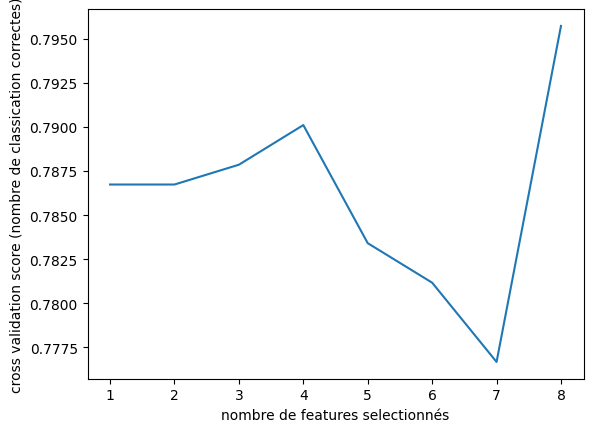

In [116]:
plt.xlabel("nombre de features selectionnés")
plt.ylabel("cross validation score (nombre de classication correctes)")
plt.plot(range(1, len(rfe.cv_results_['mean_test_score']) + 1), rfe.cv_results_['mean_test_score'])
plt.show()